In [62]:
import math
import numpy as np
import numpy.random as npr  
from pylab import plt, mpl

$$dS_t = rS_t+\sqrt{v_t}S_tdW_{1, t}$$
$$dv_t = \kappa(\theta - v_t)dt + \sigma \sqrt{v_t} dW_{2, t}$$
$$dW_{1, t}dW_{2,t} = \rho dt$$

In [63]:
import scipy.stats as scs    # function to output some statistics numbers
def print_statistics(a1, a2):
    ''' Prints selected statistics.
    
    Parameters
    ==========
    a1, a2: ndarray objects
        results objects from simulation
    '''
    sta1 = scs.describe(a1)  
    sta2 = scs.describe(a2)  
    print('%14s %14s %14s' % 
        ('statistic', 'data set 1', 'data set 2'))
    print(45 * "-")
    print('%14s %14.3f %14.3f' % ('size', sta1[0], sta2[0]))
    print('%14s %14.3f %14.3f' % ('min', sta1[1][0], sta2[1][0]))
    print('%14s %14.3f %14.3f' % ('max', sta1[1][1], sta2[1][1]))
    print('%14s %14.3f %14.3f' % ('mean', sta1[2], sta2[2]))
    print('%14s %14.3f %14.3f' % ('std', np.sqrt(sta1[3]), np.sqrt(sta2[3])))
    print('%14s %14.3f %14.3f' % ('skew', sta1[4], sta2[4]))
    print('%14s %14.3f %14.3f' % ('kurtosis', sta1[5], sta2[5]))

In [64]:
S0 = 4500.    # ETH price in late Nov
r = -0.7    # risk free rate, in order to simulate bear market, set it as -0.7 (70% down for ETH for a whole year)
v0 = 0.6    # sigma in the beginning  
kappa = 3.0    # mean-reversion rate
theta = 0.6    # long-term average vol
sigma = 0.1    # vol of vol
rho = -0.6    # correlation between price and vol, set to negative
T = 0.75    # 9 months, 3 months more for realized vol calc (3 months ahead data to cal realized vol)

In [65]:
corr_mat = np.zeros((2, 2))
corr_mat[0, :] = [1.0, rho]
corr_mat[1, :] = [rho, 1.0]
cho_mat = np.linalg.cholesky(corr_mat) 
# cho_mat 

In [66]:
M = 270    # 9 months divided by 270: 1 day per step
I = 10000    # number of paths
dt = T / M

In [67]:
ran_num = npr.standard_normal((2, M + 1, I))  
v = np.zeros_like(ran_num[0])
vh = np.zeros_like(v)
v[0] = v0
vh[0] = v0

In [68]:
for t in range(1, M + 1):
    ran = np.dot(cho_mat, ran_num[:, t, :])  
    vh[t] = (vh[t - 1] +
             kappa * (theta - np.maximum(vh[t - 1], 0)) * dt +
             sigma * np.sqrt(np.maximum(vh[t - 1], 0)) * 
             math.sqrt(dt) * ran[1])  
v = np.maximum(vh, 0)

In [69]:
S = np.zeros_like(ran_num[0])
S[0] = S0
for t in range(1, M + 1):
    ran = np.dot(cho_mat, ran_num[:, t, :])
    S[t] = S[t - 1] * np.exp((r - 0.5 * v[t]) * dt +
                    np.sqrt(v[t]) * ran[0] * np.sqrt(dt))

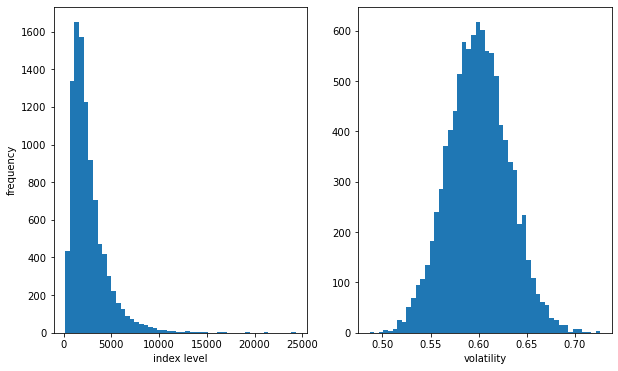

In [70]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
ax1.hist(S[-1], bins=50)
ax1.set_xlabel('index level')
ax1.set_ylabel('frequency')
ax2.hist(v[-1], bins=50)
ax2.set_xlabel('volatility');
# plt.savefig('../.../distribution.png');

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min        160.936          0.487
           max      24324.841          0.726
          mean       2620.901          0.600
           std       1979.260          0.032
          skew          2.665          0.089
      kurtosis         13.278          0.017


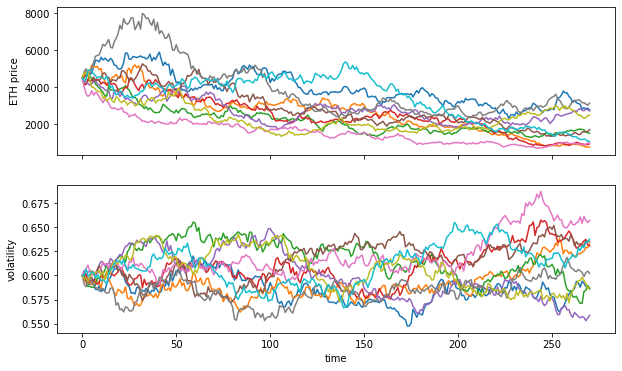

In [71]:
print_statistics(S[-1], v[-1])
     
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True,
                               figsize=(10, 6))
ax1.plot(S[:, :10], lw=1.5)
ax1.set_ylabel('ETH price')
ax2.plot(v[:, :10], lw=1.5)
ax2.set_xlabel('time')
ax2.set_ylabel('volatility');
# plt.savefig('../../10paths_sample.png');

The most bearish price in the end:  160.93644360673804
The path index which has most bearish price in the end:  5172


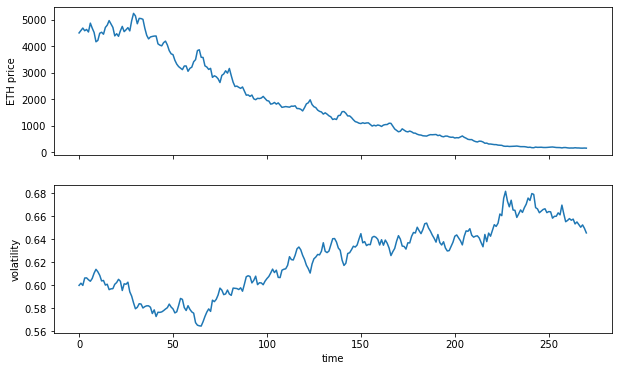

In [122]:
most_drawdown_price = min(S[-1,:])
print('The most bearish price in the end: ', most_drawdown_price)
path_index_lowest_price = int(np.where(S[-1,:] == most_drawdown_price)[0])
print('The path index which has most bearish price in the end: ', path_index_lowest_price)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True,
                               figsize=(10, 6))
ax1.plot(S[:, [path_index_lowest_price]], lw=1.5)
ax1.set_ylabel('ETH price')
ax2.plot(v[:, [path_index_lowest_price]], lw=1.5)
ax2.set_xlabel('time')
ax2.set_ylabel('volatility');

In [83]:
stdDev = np.std(S[:,:], axis=0)
min_stdDev = min(np.std(S[:,:], axis=0))    
max_stdDev = max(np.std(S[:,:], axis=0))   

In [93]:
type(int(min_index[0]))

int

In [94]:
min_index = int(np.where(stdDev == min_stdDev)[0])
max_index = int(np.where(stdDev == max_stdDev)[0])

print("the path # that has the min realized vol:", min_index)
print("the path # that has the min realized vol:", max_index)

the path # that has the min realized vol: 9863
the path # that has the min realized vol: 6613


Blue: path with min realized 
  Yellow: path with max realized vol


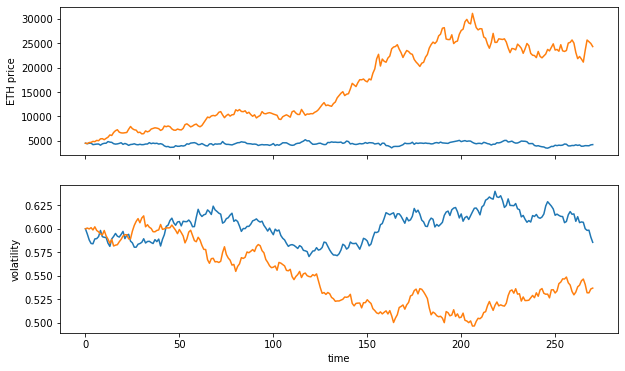

In [95]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True,
                               figsize=(10, 6))
ax1.plot(S[:, [min_index,max_index]], lw=1.5)
ax1.set_ylabel('ETH price')
ax2.plot(v[:, [min_index, max_index]], lw=1.5)
ax2.set_xlabel('time')
ax2.set_ylabel('volatility');
print("Blue: path with min realized \n  Yellow: path with max realized vol")

In [109]:
df = pd.DataFrame(S[:, [min_index,max_index]], columns = ['price with min realizedVol','price with max realizedVol'])

In [110]:
df

,price with min realizedVol,price with max realizedVol
0,4500.000000,4500.000000
1,4403.608997,4427.300837
2,4499.160347,4635.589659
3,4515.187972,4676.404102
4,4207.603494,4875.408195
...,...,...
266,4004.280610,23545.401257
267,3997.844773,25671.381600
268,3976.779417,25319.711489
269,4165.921961,24962.872643


In [111]:
df[['impVol with min realizedVol','impVol with max realizedVol']] = v[:, [min_index,max_index]].tolist()

In [126]:
df[['maxDrawDownPrice']] = S[:,[path_index_lowest_price]].tolist()
df[['maxDDImpVol']] = v[:,[path_index_lowest_price]].tolist()

In [127]:
df

,price with min realizedVol,price with max realizedVol,impVol with min realizedVol,impVol with max realizedVol,maxDrawDownPrice,maxDDImpVol
0,4500.000000,4500.000000,0.600000,0.600000,4500.000000,0.600000
1,4403.608997,4427.300837,0.594410,0.600852,4590.552639,0.601868
2,4499.160347,4635.589659,0.588165,0.599878,4683.990553,0.599980
3,4515.187972,4676.404102,0.584366,0.601245,4583.273330,0.606381
4,4207.603494,4875.408195,0.584045,0.598777,4630.897732,0.606543
...,...,...,...,...,...,...
266,4004.280610,23545.401257,0.600106,0.540724,167.898842,0.652881
267,3997.844773,25671.381600,0.598361,0.531773,162.248109,0.650589
268,3976.779417,25319.711489,0.598541,0.531705,160.998589,0.652600
269,4165.921961,24962.872643,0.591188,0.535827,165.353762,0.649596


In [129]:
# df.to_csv('path_price and imp vol.csv')